# CS675 Computer Vision
## Assignment 1
### Kunal Arunkumar Singh
### Student ID: 02117043

1. **Download an Image:** Choose any color image. Ensure the image is in <mark>`.jpg`</mark> or <mark>`.png`</mark> format.

![](./images/boston_skyline_2.jpg)

2. **Aplly Filters:** You will apply the following filters to the image:
* Smoothing filters:
  * Mean Filter (Using a 3x3 kernel)
  * Gaussian Filter (sigma =1.0)
  * Median Filter
* Sharpening Filters:
  * Laplacian Filter
  * Unsharp masking
* Edge Detection Filters:
  * Sobel Filter (X and Y directions)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Load the Image

In [2]:
img = cv2.imread('./images/boston_skyline_2.jpg', 0)

#### Apply filters to image

In [3]:
mean_filtered_image = cv2.blur(img, (3,3))
gaussian_filtered_image = cv2.GaussianBlur(img,(3,3),sigmaX=1.0)
median_filtered_image = cv2.medianBlur(img, 3)

laplacian_filtered_image = cv2.Laplacian(img, cv2.CV_64F, ksize=31)
amount = 1.5 
unsharp_masking_image = cv2.addWeighted(img, 1 + amount, gaussian_filtered_image, -amount, 0)

sobel_filtered_image_X = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_filtered_image_Y = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=3)

#### Display Original Image and Filtered Image

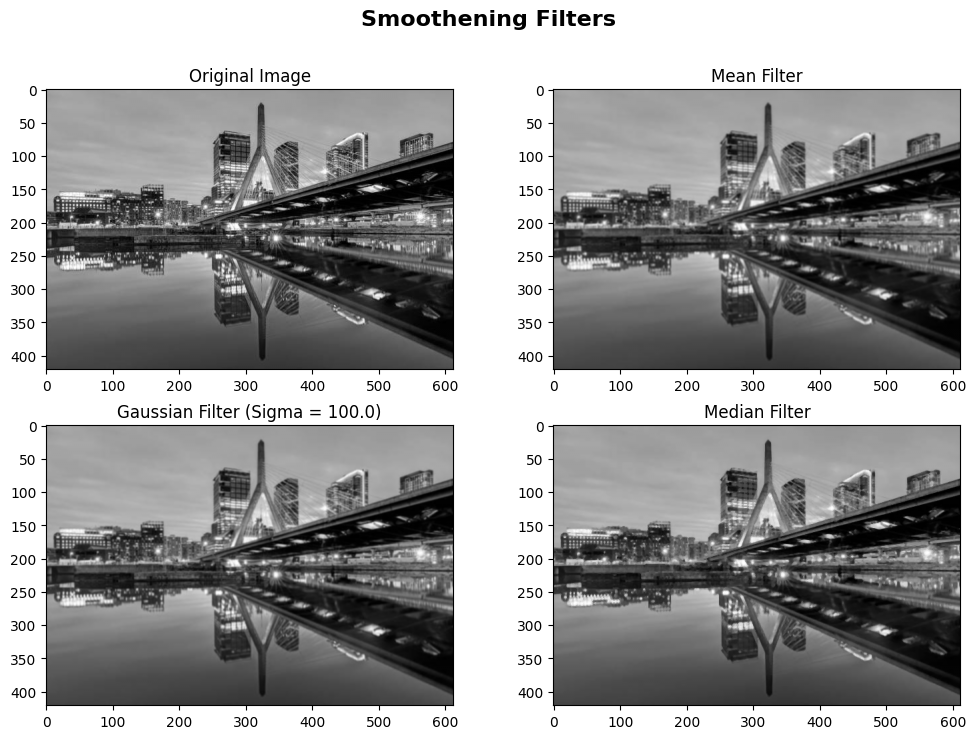

In [4]:
plt.figure(figsize=(12, 8))
plt.suptitle("Smoothening Filters", fontsize=16, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img, cmap="gray")

plt.subplot(2,2,2)
plt.title('Mean Filter')
plt.imshow(mean_filtered_image, cmap="gray")

plt.subplot(2,2,3)
plt.title('Gaussian Filter (Sigma = 100.0)')
plt.imshow(gaussian_filtered_image, cmap="gray")

plt.subplot(2,2,4)
plt.title('Median Filter')
plt.imshow(median_filtered_image, cmap="gray")



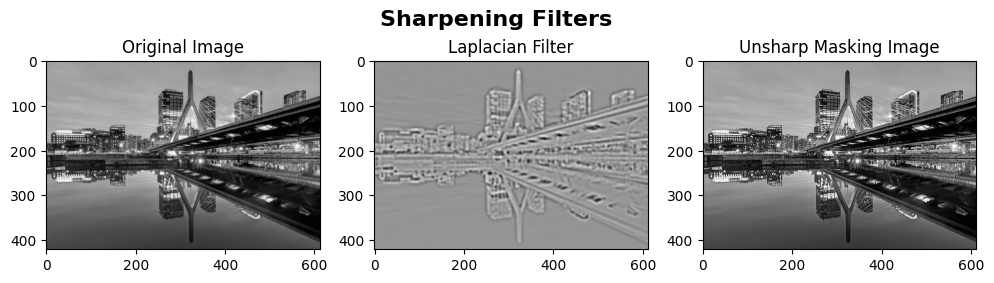

In [5]:
plt.figure(figsize=(12, 3))
plt.suptitle("Sharpening Filters", fontsize=16, fontweight='bold')

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.title('Laplacian Filter')
plt.imshow(laplacian_filtered_image, cmap="gray")

plt.subplot(1,3,3)
plt.title('Unsharp Masking Image')
plt.imshow(unsharp_masking_image, cmap="gray")

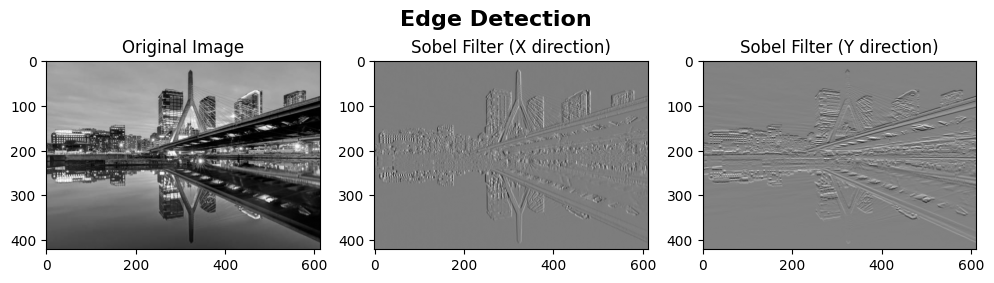

In [6]:
plt.figure(figsize=(12, 3))  # Adjust size as needed
plt.suptitle("Edge Detection", fontsize=16, fontweight='bold')

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.title('Sobel Filter (X direction)')
plt.imshow(sobel_filtered_image_X, cmap="gray")

plt.subplot(1,3,3)
plt.title('Sobel Filter (Y direction)')
plt.imshow(sobel_filtered_image_Y, cmap="gray")


# Image Filtering Assignment

## 1. Introduction and Objectives
This assignment focuses on applying various image filtering techniques to process and analyze an image. The objective is to implement smoothing, sharpening, and edge detection filters and evaluate their effectiveness in enhancing image quality and extracting meaningful features. The significance of these filters in image processing will be discussed in detail.

## 2. Implementation with Justification

### 2.1 Smoothing Filters
#### Mean Filter (3x3 Kernel)
- **Implementation:**
```python
mean_filtered_image = cv2.blur(img, (3,3))
```
- **Justification:** The mean filter smooths the image by averaging pixel values within a local neighborhood, reducing noise while preserving important structures.

#### Gaussian Filter (Sigma = 1.0)
- **Implementation:**
```python
gaussian_filtered_image = cv2.GaussianBlur(img,(3,3),sigmaX=1.0)
```
- **Justification:** The Gaussian filter reduces noise while maintaining edges, making it preferable over a simple mean filter.

#### Median Filter
- **Implementation:**
```python
median_filtered_image = cv2.medianBlur(img, 3)
```
- **Justification:** The median filter is effective in removing salt-and-pepper noise while preserving edges.

### 2.2 Sharpening Filters
#### Laplacian Filter
- **Implementation:**
```python
laplacian_filtered_image = cv2.Laplacian(img, cv2.CV_64F, ksize=31)
```
- **Justification:** The Laplacian filter highlights regions of rapid intensity change, making it useful for detecting edges and sharpening images.

#### Unsharp Masking
- **Implementation:**
```python
amount = 1.5
unsharp_masking_image = cv2.addWeighted(img, 1 + amount, gaussian_filtered_image, -amount, 0)
```
- **Justification:** This technique enhances details by subtracting a blurred version of the image from the original, improving contrast and sharpness.

### 2.3 Edge Detection Filters
#### Sobel Filter (X and Y directions)
- **Implementation:**
```python
sobel_filtered_image_X = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_filtered_image_Y = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=3)
```
- **Justification:** The Sobel filter detects edges by computing intensity gradients in both horizontal and vertical directions, providing information about image structure.

## 3. Results and Analysis
The results of each filtering technique are presented below, showcasing the effect on the original image.

### Visualization of Results
- **Original Image**
- **Filtered Images for Each Technique**

**Key Observations:**
- Noise reduction effectiveness of smoothing filters.
- Edge enhancement capabilities of sharpening filters.
- Structural feature extraction through edge detection methods.

## 4. Discussion of Findings
- **Comparison of Different Filtering Techniques**
- **Effectiveness in Noise Reduction, Sharpening, and Edge Detection**
- **Limitations and Challenges Faced**
- **Potential Improvements and Future Work**

## 5. Conclusion
This report demonstrated the application of image filtering techniques, highlighting their advantages and drawbacks. The results emphasize the importance of selecting appropriate filters based on the desired image processing goal. Future work could involve optimizing filter parameters and exploring advanced deep-learning-based image enhancement methods.


**3. Add and remove high-frequency noise to the image:**
- Generate a noisy color image (random number generation functions such as
Numpy’s randint(). However, noise generated by these random number generators
span all frequencies of the spectrum).
- Design a filtering approach o generate high-frequency noise from the noise
generated above.
- Add both noises to the image and compare them.
- Design a filter that completely removes the high-frequency noise.
- Plot the results.

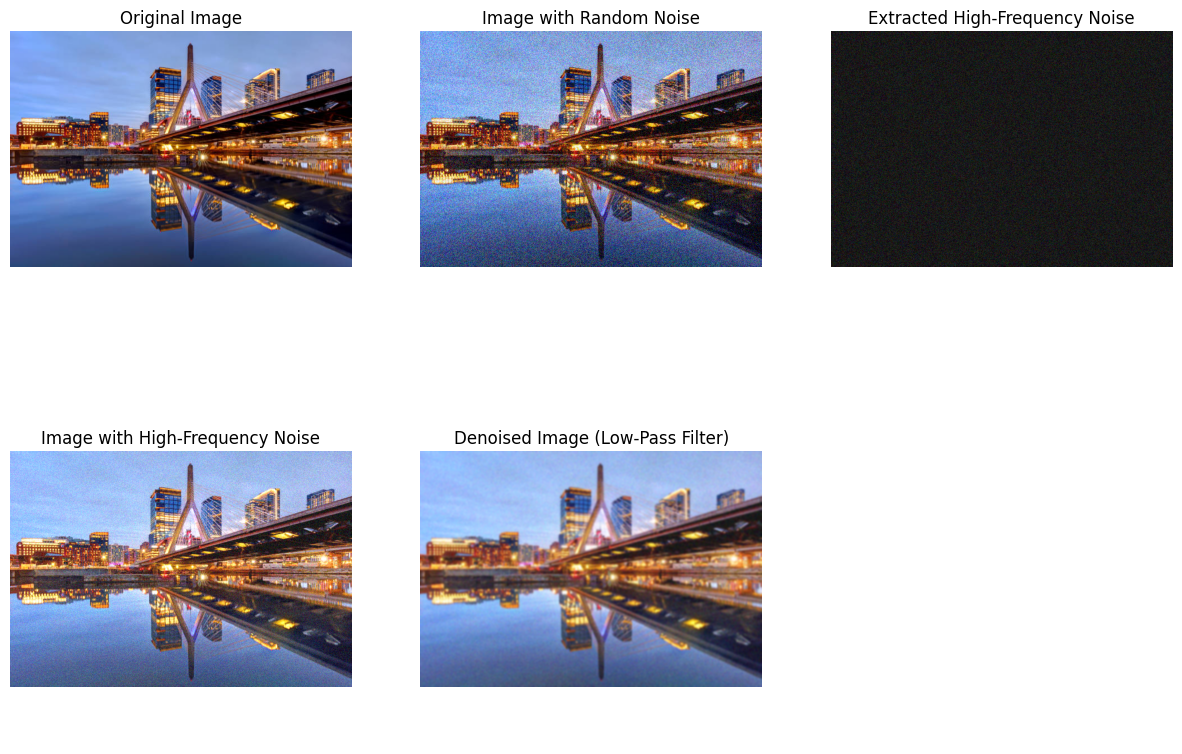

In [7]:
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

# Load the image in color
img = cv2.imread('./images/boston_skyline_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generate random noise spanning all frequencies for each channel
noise = np.random.randint(-50, 50, img.shape, dtype=np.int16)
noisy_image = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Function to apply a high-pass filter on each color channel
def high_pass_filter(img, cutoff=30):
    img_filtered = np.zeros_like(img, dtype=np.float32)
    for i in range(3):  # Process each RGB channel separately
        f = fft2(img[:, :, i])
        fshift = fftshift(f)

        rows, cols = img.shape[:2]
        crow, ccol = rows // 2, cols // 2

        mask = np.ones((rows, cols), dtype=np.uint8)
        mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 0  # Block low frequencies

        fshift_filtered = fshift * mask
        img_filtered[:, :, i] = np.abs(ifft2(ifftshift(fshift_filtered)))

    return np.clip(img_filtered, 0, 255).astype(np.uint8)

# Convert noise to uint8 before processing
noise_uint8 = np.clip(noise + 50, 0, 255).astype(np.uint8)

# Extract high-frequency noise correctly (preserving color)
high_freq_noise = high_pass_filter(noise_uint8)

# Add high-frequency noise to the original image
image_with_high_freq_noise = np.clip(img.astype(np.int16) + high_freq_noise, 0, 255).astype(np.uint8)

# Apply Gaussian Blur to remove high-frequency noise
denoised_image = cv2.GaussianBlur(image_with_high_freq_noise, (7, 7), 1.5)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(noisy_image)
axes[0, 1].set_title("Image with Random Noise")
axes[0, 1].axis("off")

axes[0, 2].imshow(high_freq_noise)
axes[0, 2].set_title("Extracted High-Frequency Noise")
axes[0, 2].axis("off")

axes[1, 0].imshow(image_with_high_freq_noise)
axes[1, 0].set_title("Image with High-Frequency Noise")
axes[1, 0].axis("off")

axes[1, 1].imshow(denoised_image)
axes[1, 1].set_title("Denoised Image (Low-Pass Filter)")
axes[1, 1].axis("off")

axes[1, 2].axis("off")

plt.show()



## Task 3

### a. Introduction and Objectives
Image processing techniques are widely used for noise reduction, feature extraction, and image enhancement. This report examines the impact of high-frequency noise on images and the effectiveness of filtering techniques in noise removal. The primary objectives of this task are:
- To generate and introduce high-frequency noise into an image.
- To develop a filtering method for isolating high-frequency noise components.
- To implement a noise removal strategy using low-pass filters.
- To analyze the effectiveness of these approaches and their impact on image quality.

### b. Implementation with Justification
The methodology adopted in this experiment follows a structured approach, ensuring clarity in implementation and justification of each step.

1. **Image Loading & Preprocessing:**
   - The input image is loaded in color using OpenCV and converted to the RGB format to ensure proper visualization and consistency across different display environments.

2. **Noise Generation:**
   - Random noise is generated for each channel independently, ensuring uniform distribution across all frequencies. This approach allows for a more realistic noise model compared to single-channel grayscale noise.
   - The noise is added to the original image while keeping pixel values within a valid range to prevent over-saturation.

3. **High-Frequency Noise Extraction:**
   - A high-pass filter is implemented using the Fourier Transform (FFT) to isolate high-frequency components, which typically represent edges and fine details in the image.
   - The filtering is performed separately on each RGB channel, preserving color information while extracting high-frequency noise.

4. **Noise Addition to Image:**
   - The extracted high-frequency noise is incorporated back into the original image to observe its effects on visual perception and image clarity.

5. **Noise Removal Using Low-Pass Filtering:**
   - A Gaussian blur is applied to suppress high-frequency noise while preserving the overall structure of the image.
   - The effectiveness of the filtering process is evaluated by comparing the filtered image with the noisy version.

### c. Results and Analysis
The following images illustrate the outcomes of each step:
1. **Original Image** – The unmodified input image.
2. **Image with Random Noise** – The image after synthetic noise has been introduced.
3. **Extracted High-Frequency Noise** – The noise component isolated using FFT-based high-pass filtering.
4. **Image with High-Frequency Noise** – The original image with high-frequency noise superimposed.
5. **Denoised Image** – The final output after applying a low-pass Gaussian filter.

From the results, it is evident that the Gaussian blur effectively reduces high-frequency noise. However, it also results in minor blurring of fine details, highlighting the trade-off between noise suppression and detail retention.

### d. Discussion of Findings
- **Effectiveness of High-Pass Filtering:** The FFT-based high-pass filter successfully isolates high-frequency components, making it a useful tool for noise analysis and edge detection.
- **Impact of Noise on Image Quality:** The addition of high-frequency noise makes the image appear sharper but at the cost of introducing artifacts that may not be desirable in all applications.
- **Performance of Low-Pass Filtering:** The Gaussian blur is effective in suppressing noise, but it slightly reduces image sharpness. This suggests that alternative methods, such as bilateral filtering, could offer a better balance between noise reduction and detail preservation.
- **Computational Considerations:** While the Fourier transform approach provides fine control over frequency components, it is computationally more expensive compared to spatial-domain filtering methods.

### e. Conclusions
This study examined noise generation, extraction, and removal techniques in image processing. The high-pass filter based on the Fourier Transform effectively isolated high-frequency noise, while Gaussian blurring successfully suppressed it, albeit with a minor loss of detail. The findings highlight the importance of selecting an appropriate filtering technique based on specific application requirements. Future work could explore more advanced denoising techniques, such as adaptive filtering or deep learning-based approaches, to achieve better noise suppression while preserving fine image details.
